## Importing Libraries

In [6]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Importing Data Set

In [7]:
dataset = pd.read_csv('dataset/clean-sleep-efficiency.csv')
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,alcohol_consumption_filled,smoking_status,exercise_frequency,exercise_frequency_filled,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,0.0,Yes,3.0,3.0,1,1.0,7,7.0,1,0
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,3.0,Yes,3.0,3.0,2,2.0,9,9.0,1,1
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,0.0,No,3.0,3.0,21,21.0,5,5.0,0,0
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,5.0,Yes,1.0,1.0,2,2.0,8,8.0,1,0
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,3.0,No,3.0,3.0,1,1.0,9,9.0,0,1


## Principal Component Analysis (PCA)
In this portion, we will use PCA which is a technique for reducing the dimensionality of a dataset by identifying the most important underlying patterns or features. We apply PCA to the existing variables (sleep efficiency, deep sleep percentage, REM sleep percentage, number of awakenings) to identify the principal components that explain the most variance in the data. Based on the the contribution of each variable to the principal components, we can assign weights to each of the existing variables.

| Steps | Procedure | Description |
| ------------ | --------- | ------------|
| 1 | Data Preparation | - Collect data on the factors that contribute to sleep quality (sleep efficiency, deep sleep percentage, REM sleep percentage, number of awakenings), and standardise the data such that they are **numerical** and each variable has a **mean of 0** and a **standard deviation of 1**. |
| 2 | Perform PCA | Apply PCA to the normalized data to identify the principal components that explain the most variance in the data. The number of principal components to keep should be determined by examining the explained variance ratio or scree plot, and selecting the number of components that capture a sufficient amount of variance in the data. |
| 3 | Interpret Principal Components | Examine the loadings of each variable on the principal components to understand which variables contribute the most to each component. The loadings represent the correlation between each variable and the principal component, and **can be positive or negative**. Variables with **high absolute loadings are most strongly associated** with the principal component. |
| 4 | Calculate Weights | Once the principal components and variable loadings are identified, the weights for each variable can be calculated based on their contribution to the principal components. For example, the weight for sleep efficiency could be based on its loading on the first principal component, while the weight for deep sleep percentage could be based on its loading on the second principal component. |
| 5 | Calculate Sleep Quality Score | Finally, the sleep quality score can be calculated as a weighted sum of the different variables using the weights identified in step 4. For example, the sleep quality score could be calculated as: |

**Sleep Quality Score = w1 * Sleep Efficiency + w2 * Deep Sleep Percentage + w3 * REM Sleep Percentage - w4 * Number of Awakenings**

where w1, w2, w3, and w4 are the weights calculated based on the PCA analysis.


//remove this part?? or like we justify why we used this instead of other approaches?
PCA is just one approach to identifying weights for the different variables. The weights identified using PCA may not be optimal for all datasets or contexts. Thus, it is important to carefully evaluate the results and consider other approaches as well.

### Import Libraries for PCA

In [8]:
#import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Standardize the data

In [9]:
sleep_quality_vars = dataset.filter(['sleep_efficiency', 'light_sleep_percentage', 'deep_sleep_percentage', 'rem_sleep_percentage','awakenings_filled'])

# Normalize the data using the StandardScaler
scaler = StandardScaler() 
sleep_scaled = scaler.fit_transform(sleep_quality_vars)

print(sleep_scaled)

[[ 0.67426034 -0.82121854  1.09849019 -1.31032529 -1.23876602]
 [-0.95431503  1.8590953  -1.58746264 -1.02640054  1.02560741]
 [ 0.74828649 -0.95196556  1.09849019 -0.74247579 -0.48397487]
 ...
 [-1.76860272  1.53222776 -1.33165761 -0.74247579 -0.48397487]
 [-0.2140535  -0.95196556  1.22639271 -1.31032529  1.02560741]
 [-1.17639349  1.98984231 -1.90721893 -0.17462629 -0.48397487]]


### Create a PCA Object with all components and fit the PCA model to the scaled data

In [10]:
# Apply PCA to the normalized data
pca = PCA()
sleep_pca = pca.fit_transform(sleep_scaled)

# Examine explained variance ratio to determine number of principal components to keep
print(pca.explained_variance_ratio_)

[5.91054096e-01 2.14346972e-01 1.62437452e-01 3.21614797e-02
 7.46068662e-34]


### Creating Sleep Quality based on weightage derived from PCA Explained Variance Ratio

In [11]:
#Create sleep quality based on the PCA components and the weights
weights = [5.91054096e-01, 2.14346972e-01, 1.62437452e-01, 3.21614797e-02, 2.36798868e-32]
sleep_quality = (sleep_pca[:,0] * weights[0]) + (sleep_pca[:,1] * weights[1]) + (sleep_pca[:,2] * weights[2]) + (sleep_pca[:,3] * weights[3])
dataset['sleep_quality'] = sleep_quality
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,smoking_status,exercise_frequency,exercise_frequency_filled,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type,sleep_quality
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,Yes,3.0,3.0,1,1.0,7,7.0,1,0,-1.038628
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,Yes,3.0,3.0,2,2.0,9,9.0,1,1,1.705723
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,No,3.0,3.0,21,21.0,5,5.0,0,0,-0.876008
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,Yes,1.0,1.0,2,2.0,8,8.0,1,0,2.028781
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,No,3.0,3.0,1,1.0,9,9.0,0,1,0.192627


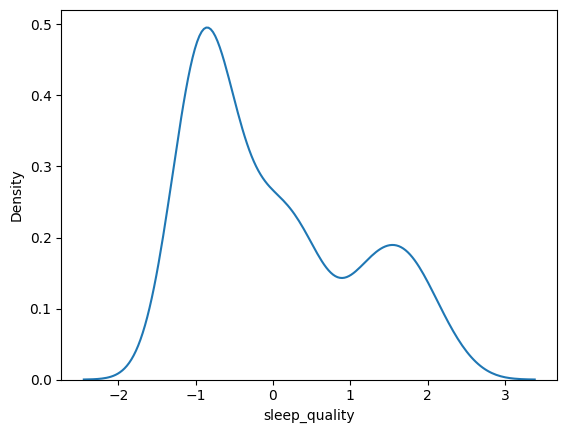

In [12]:
sb.kdeplot(dataset['sleep_quality'])
plt.show()

### Export to new CSV file 

In [13]:
dataset.to_csv('dataset/pca-sleep-efficiency.csv', encoding='utf-8', index=False)

Now, we have a proper file to be used for our machine learning models.